In [1]:
!dir

 Volume in drive C is OS
 Volume Serial Number is AA23-606F

 Directory of C:\Users\Paul\PycharmProjects\BlogPost

05/21/2019  04:54 PM    <DIR>          .
05/21/2019  04:54 PM    <DIR>          ..
05/20/2019  07:40 PM             1,454 .gitignore
05/21/2019  04:54 PM    <DIR>          .idea
05/21/2019  04:10 PM    <DIR>          .ipynb_checkpoints
05/20/2019  07:43 PM    <DIR>          data
05/21/2019  02:47 PM                 0 deserts.py
05/21/2019  04:54 PM             8,366 main.py
05/20/2019  07:01 PM             4,930 readme.md
05/21/2019  04:52 PM            75,724 Untitled.ipynb
05/21/2019  04:11 PM    <DIR>          __pycache__
               5 File(s)         90,474 bytes
               6 Dir(s)  85,060,755,456 bytes free


In [2]:
%matplotlib inline

In [5]:
%run -i main.py

         Year    Age   Race   Income  Adults  Children  Total_household  \
51367  2015.0  35-39  White     $75+     3.0       1.0              4.0   
51382  2015.0  25-29  White     $75+     2.0       0.0              2.0   
51396  2015.0  25-29  Asian     $75+     1.0       3.0              4.0   
51430  2015.0  25-29  White  $50-75K     1.0       0.0              1.0   
51464  2015.0  35-39  White     $75+     2.0       4.0              6.0   

       Zip-code  Food-Desert  Unemployed  Active Overweight Pre-Diabetic  \
51367   98198.0         True       False   False      False        False   
51382   98057.0         True       False   False        NaN        False   
51396   98166.0         True       False   False       True        False   
51430   98106.0         True       False   False       True        False   
51464   98058.0         True       False   False       True        False   

      Diabetic  Good-health  Fruit_everyday  Veg_everyday  Fruit_every_week  \
51367    Fals

In [6]:
df17_desert_melt = df17_desert.melt(id_vars='Diabetic',
                                    value_vars=['Fruit_everyday', 'Veg_everyday', 'Fruit_every_week', 'Veg_every_week', 'Fruit_every_month', 'Veg_every_month'],
                                    value_name='Fruits and Vegies')

In [7]:
df17_desert_melt.head()

,Diabetic,variable,Fruits and Vegies
0,False,Fruit_everyday,False
1,False,Fruit_everyday,False
2,False,Fruit_everyday,False
3,False,Fruit_everyday,False
4,False,Fruit_everyday,False


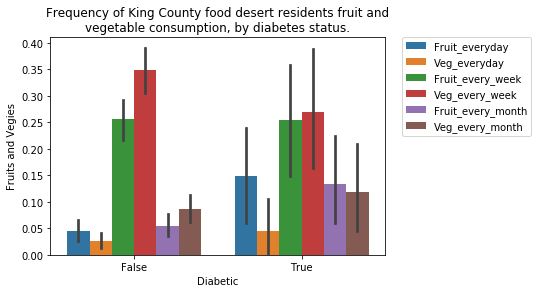

In [13]:
sns.barplot('Diabetic', 'Fruits and Vegies', hue='variable', data=df17_desert_melt)
plt.title('Frequency of King County food desert residents fruit and\nvegetable consumption, by diabetes status.')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [10]:
df17_oasis_melt = df17_oasis.melt(id_vars='Diabetic',
                                  value_vars=['Fruit_everyday', 'Veg_everyday', 'Fruit_every_week', 'Veg_every_week', 'Fruit_every_month', 'Veg_every_month'],
                                  value_name='Fruits and Vegies')

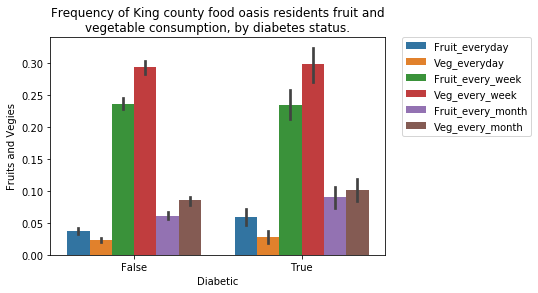

In [12]:
sns.barplot('Diabetic', 'Fruits and Vegies', hue='variable', data=df17_oasis_melt)
plt.title('Frequency of King county food oasis residents fruit and\nvegetable consumption, by diabetes status.')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);